## Convolutional Layer

### Import libraries and display the image

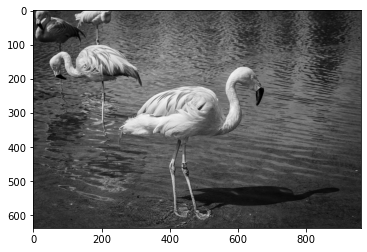

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

image = cv2.imread('D:/ComputerVision/images/flamingos.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the image to float32 and scale 
gray = (np.float32(gray))/255

plt.imshow(gray, cmap='gray')



### Define and visualize the filters

In [11]:
filter_vals = np.array([[-1,-1,1,1], [-1,-1,1,1],[-1,-1,1,1], [-1,-1,1,1]])

# Define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out 4 filters
print("Filter 1: \n", filter_1, '\n')
print("Filter 2: \n", filter_2, '\n')
print("Filter 3: \n", filter_3, '\n')
print("Filter 4: \n", filter_4, '\n')
print("Filters: \n", filters, '\n')

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]] 

Filter 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]] 

Filter 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]] 

Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]] 

Filters: 
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]] 



### Define a convolutional layer

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        # 1 input image channel
        # 4 output channels/feature maps
        # k_height x k_width convolutional kernel
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualize the output of each filter

In [13]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
   fig = plt.figure(figsize=(20,20))

   for i in range(n_filters):
       ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])

       # grab layer outputs
       ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
       ax.set_title('Output %s' %str(i+1))
    

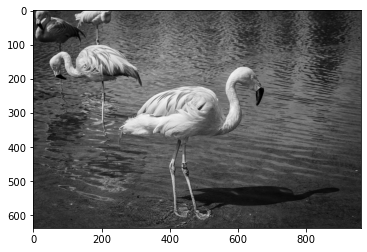

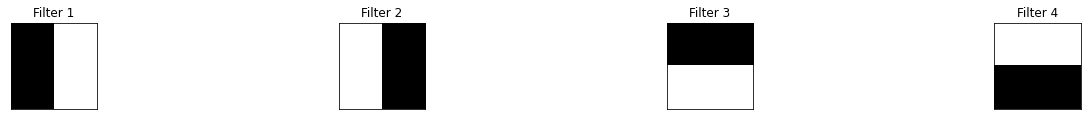

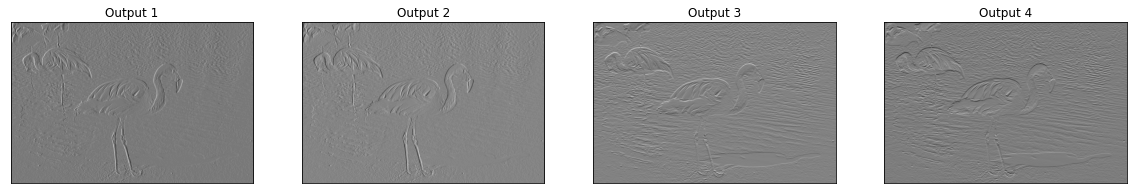

In [14]:
# plot original image
plt.imshow(gray, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

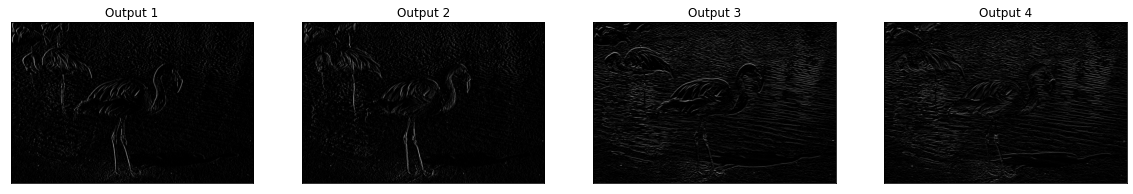

In [15]:
viz_layer(activated_layer)